In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [89]:
# load day dataset in analytics bikesharing
days_df = pd.read_csv("data/day.csv")
days_df.sample(15)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
107,108,2011-04-18,2,0,4,0,1,1,1,0.512500,0.503146,0.542500,0.163567,669,2760,3429
305,306,2011-11-02,4,0,11,0,3,1,1,0.377500,0.390133,0.718750,0.082092,370,3816,4186
55,56,2011-02-25,1,0,2,0,5,1,2,0.364348,0.350461,0.712174,0.346539,120,1341,1461
143,144,2011-05-24,2,0,5,0,2,1,2,0.660000,0.604813,0.740833,0.207092,659,3833,4492
507,508,2012-05-22,2,1,5,0,2,1,2,0.615000,0.580825,0.765833,0.118167,819,5254,6073
540,541,2012-06-24,3,1,6,0,0,0,1,0.743333,0.674254,0.479167,0.145525,2551,4340,6891
534,535,2012-06-18,2,1,6,0,1,1,2,0.568333,0.544842,0.777917,0.174746,653,4446,5099
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965
139,140,2011-05-20,2,0,5,0,5,1,1,0.536667,0.529042,0.719583,0.125013,909,4008,4917
77,78,2011-03-19,1,0,3,0,6,0,1,0.472500,0.466525,0.379167,0.368167,1424,1693,3117


In [90]:

# Assesing value each columns in dataset day 
days_df.info()
days_df.isna().sum()

# Checking duplicated data
print("Jumlah data duplikat:", days_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah data duplikat: 0


In [91]:
days_df.describe() # Checking summary statistik

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [92]:
# Load dataset hours
hours_df = pd.read_csv("data/hour.csv")
hours_df.sample(15)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12360,12361,2012-06-04,2,1,6,5,0,1,1,1,0.52,0.5000,0.68,0.0000,2,33,35
1519,1520,2011-03-08,1,0,3,16,0,2,1,1,0.38,0.3939,0.27,0.1642,26,82,108
15965,15966,2012-11-02,4,1,11,22,0,5,1,1,0.36,0.3333,0.46,0.2537,14,135,149
14123,14124,2012-08-16,3,1,8,16,0,4,1,1,0.82,0.7121,0.32,0.2239,79,340,419
14202,14203,2012-08-19,3,1,8,23,0,0,0,2,0.62,0.5909,0.73,0.0000,7,39,46
11330,11331,2012-04-22,2,1,4,7,0,0,0,3,0.42,0.4242,0.77,0.3881,2,22,24
15958,15959,2012-11-02,4,1,11,15,0,5,1,2,0.40,0.4091,0.40,0.4179,51,255,306
1191,1192,2011-02-22,1,0,2,16,0,2,1,1,0.22,0.2273,0.51,0.1642,7,79,86
13820,13821,2012-08-04,3,1,8,1,0,6,0,1,0.72,0.7121,0.84,0.1940,23,99,122
625,626,2011-01-29,1,0,1,8,0,6,0,1,0.18,0.1970,0.55,0.1642,3,31,34


In [93]:
# Assesing value each columns in hours dataset
hours_df.info() # checking missing value

print("Jumlah data duplikat:", hours_df.duplicated().sum()) # checking duplicate data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah data duplikat: 0


In [94]:
# checking summary statistik
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil dari Assesing Data: 


A. Dataset Days
1. Duplicate : -
2. Missing value : - 
3. Tipe data : 
   1. Datetime : Datetime
4. Summary statistik : -

B. Dataset Hour
1. Duplicate : -
2. Missing Value: -
3. Tipe data: 
   1. Datetime: Datetime
4. Summary statistik: -

Tetapi harus mengubah nama col dari kedua dataset (Days and Hours) tersebut

In [95]:
# Rename coloumn in dataset day
days_df.rename(columns={
    "dteday" : "date_day",
    "yr": "year",
    "mnth" : "month",
    "weathersit" : "weather_situation",
    "hum": "humidity",
    "cnt" : "count"
}, inplace=True)

days_df.head()

,instant,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [96]:
# Rename coloumn in dataset hour
hours_df.rename(columns={
    "dteday" : "date_day",
    "yr": "year",
    "hr" : "hour",
    "mnth" : "month",
    "weathersit" : "weather_situation",
    "hum": "humidity",
    "cnt" : "count"
}, inplace=True)


In [97]:
# Change type data column date_day from object to datetime in day dataset
days_df["date_day"] = pd.to_datetime(days_df["date_day"])

days_df.info()
days_df.sample(10)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date_day           731 non-null    datetime64[ns]
 2   season             731 non-null    int64         
 3   year               731 non-null    int64         
 4   month              731 non-null    int64         
 5   holiday            731 non-null    int64         
 6   weekday            731 non-null    int64         
 7   workingday         731 non-null    int64         
 8   weather_situation  731 non-null    int64         
 9   temp               731 non-null    float64       
 10  atemp              731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  windspeed          731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

,instant,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
232,233,2011-08-21,3,0,8,0,0,0,1,0.710833,0.675525,0.770000,0.248754,1249,2624,3873
510,511,2012-05-25,2,1,5,0,5,1,1,0.680000,0.627529,0.747083,0.140550,1417,5317,6734
245,246,2011-09-03,3,0,9,0,6,0,1,0.669167,0.633213,0.716667,0.185325,1935,2549,4484
66,67,2011-03-08,1,0,3,0,2,1,1,0.292500,0.302400,0.420833,0.120650,316,1817,2133
586,587,2012-08-09,3,1,8,0,4,1,1,0.755833,0.699508,0.620417,0.156100,1196,6090,7286
200,201,2011-07-20,3,0,7,0,3,1,1,0.768333,0.746850,0.707083,0.113817,644,3688,4332
117,118,2011-04-28,2,0,4,0,4,1,2,0.617500,0.578929,0.700833,0.320908,569,3489,4058
132,133,2011-05-13,2,0,5,0,5,1,2,0.512500,0.494300,0.863333,0.179725,692,3413,4105
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
611,612,2012-09-03,3,1,9,1,1,0,1,0.707500,0.661629,0.790833,0.151121,1965,4069,6034


In [98]:
# Change type data column date_day from object to datetime in day dataset
hours_df["date_day"] = pd.to_datetime(hours_df["date_day"])

hours_df.info()
hours_df.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            17379 non-null  int64         
 1   date_day           17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   holiday            17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   workingday         17379 non-null  int64         
 9   weather_situation  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
10116,10117,2012-03-02,1,1,3,14,0,5,1,2,0.44,0.4394,0.44,0.2836,29,176,205
16920,16921,2012-12-12,4,1,12,19,0,3,1,2,0.30,0.2879,0.56,0.2239,18,384,402
14376,14377,2012-08-27,3,1,8,5,0,1,1,1,0.62,0.5606,0.88,0.0000,4,32,36
16368,16369,2012-11-19,4,1,11,18,0,1,1,2,0.40,0.4091,0.58,0.2537,21,559,580
9231,9232,2012-01-25,1,1,1,13,0,3,1,1,0.34,0.3333,0.49,0.1343,63,149,212
4081,4082,2011-06-23,3,0,6,23,0,4,1,1,0.70,0.6667,0.74,0.2836,15,90,105
15132,15133,2012-09-27,4,1,9,17,0,4,1,2,0.66,0.6212,0.69,0.2985,87,818,905
15152,15153,2012-09-28,4,1,9,13,0,5,1,2,0.70,0.6515,0.51,0.2537,106,304,410
12657,12658,2012-06-16,2,1,6,14,0,6,0,1,0.72,0.6515,0.37,0.2239,264,309,573
10941,10942,2012-04-06,2,1,4,1,0,5,1,1,0.36,0.3485,0.62,0.1343,10,28,38


In [99]:
# Change value in coloumn season Day dataset
days_df["season"] = pd.Categorical(
    days_df["season"].replace({1:"Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}), categories=["Spring", "Summer", "Autumn", "Winter"]
)


days_df.sample(10)

,instant,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
720,721,2012-12-21,Spring,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623
474,475,2012-04-19,Summer,1,4,0,4,1,1,0.498333,0.493046,0.612500,0.065929,846,5719,6565
640,641,2012-10-02,Winter,1,10,0,2,1,3,0.590833,0.542333,0.871667,0.104475,315,4324,4639
596,597,2012-08-19,Autumn,1,8,0,0,0,2,0.635833,0.603554,0.711667,0.086450,1208,3341,4549
399,400,2012-02-04,Spring,1,2,0,6,0,2,0.264167,0.272725,0.779583,0.121896,384,2448,2832
714,715,2012-12-15,Winter,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047
480,481,2012-04-25,Summer,1,4,0,3,1,1,0.476667,0.470317,0.427917,0.118792,655,5541,6196
224,225,2011-08-13,Autumn,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150
707,708,2012-12-08,Winter,1,12,0,6,0,2,0.381667,0.389508,0.911250,0.101379,1153,4429,5582
270,271,2011-09-28,Winter,0,9,0,3,1,2,0.635000,0.575158,0.848750,0.148629,480,3427,3907


In [100]:
# Change value in coloumn weather_situation Day dataset
days_df["weather_situation"] = pd.Categorical(
    days_df["weather_situation"].replace({1:"Sunny", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Thunderstorm"}), categories=["Sunny", "Cloudy", "Light Rain/Snow", "Heavy Rain/Thunderstorm"]
)

days_df.sample(10)

,instant,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
27,28,2011-01-28,Spring,0,1,0,5,1,Cloudy,0.203478,0.223317,0.793043,0.123300,38,1129,1167
47,48,2011-02-17,Spring,0,2,0,4,1,Sunny,0.435833,0.428658,0.505000,0.230104,259,2216,2475
195,196,2011-07-15,Autumn,0,7,0,5,1,Sunny,0.663333,0.624371,0.591250,0.182833,1318,4220,5538
210,211,2011-07-30,Autumn,0,7,0,6,0,Sunny,0.804167,0.728537,0.465833,0.168537,1559,2916,4475
341,342,2011-12-08,Winter,0,12,0,4,1,Sunny,0.265833,0.256938,0.580000,0.240058,150,3172,3322
109,110,2011-04-20,Summer,0,4,0,3,1,Sunny,0.595000,0.564392,0.614167,0.241925,613,3331,3944
465,466,2012-04-10,Summer,1,4,0,2,1,Sunny,0.446667,0.436233,0.435000,0.249375,819,5099,5918
157,158,2011-06-07,Summer,0,6,0,2,1,Sunny,0.707500,0.655950,0.597917,0.187808,763,4070,4833
238,239,2011-08-27,Autumn,0,8,0,6,0,Cloudy,0.680000,0.635556,0.850000,0.375617,226,889,1115
676,677,2012-11-07,Winter,1,11,0,3,1,Cloudy,0.295833,0.274621,0.547500,0.304108,326,4709,5035


In [101]:
# Change value in coloumn weekday Day dataset
days_df["weekday"] = pd.Categorical(
    days_df["weekday"].replace({0: "Sunday", 1:"Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}), categories=["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
)

days_df.sample(10)

,instant,date_day,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
582,583,2012-08-05,Autumn,1,8,0,Sunday,0,Sunny,0.769167,0.731079,0.652500,0.290421,1707,3757,5464
697,698,2012-11-28,Winter,1,11,0,Wednesday,1,Sunny,0.296667,0.289762,0.506250,0.210821,198,5062,5260
99,100,2011-04-10,Summer,0,4,0,Sunday,0,Cloudy,0.426667,0.426737,0.857500,0.146767,1188,1707,2895
310,311,2011-11-07,Winter,0,11,0,Monday,1,Sunny,0.395000,0.400871,0.758750,0.057225,373,3662,4035
107,108,2011-04-18,Summer,0,4,0,Monday,1,Sunny,0.512500,0.503146,0.542500,0.163567,669,2760,3429
602,603,2012-08-25,Autumn,1,8,0,Saturday,0,Cloudy,0.661667,0.618696,0.712917,0.244408,1829,4224,6053
207,208,2011-07-27,Autumn,0,7,0,Wednesday,1,Sunny,0.775000,0.690667,0.402917,0.183463,755,3901,4656
397,398,2012-02-02,Spring,1,2,0,Thursday,1,Cloudy,0.399167,0.398971,0.672917,0.187187,190,3571,3761
167,168,2011-06-17,Summer,0,6,0,Friday,1,Sunny,0.649167,0.600383,0.735833,0.143029,863,3981,4844
400,401,2012-02-05,Spring,1,2,0,Sunday,0,Cloudy,0.265833,0.264521,0.687917,0.175996,318,2629,2947


In [102]:
# Change value in coloumn season Hour dataset
hours_df["season"] = pd.Categorical(
    hours_df["season"].replace({1:"Spring", 2: "Summer", 3: "Autumn", 4: "Winter"}), categories=["Spring", "Summer", "Autumn", "Winter"]
)


hours_df.sample(15)

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
5753,5754,2011-09-02,Autumn,0,9,4,0,5,1,1,0.60,0.5606,0.83,0.0896,2,2,4
8487,8488,2011-12-25,Spring,0,12,8,0,0,0,1,0.20,0.2121,0.80,0.1642,1,4,5
8950,8951,2012-01-13,Spring,1,1,19,0,5,1,1,0.26,0.2424,0.38,0.2836,7,199,206
7826,7827,2011-11-27,Winter,0,11,17,0,0,0,1,0.54,0.5152,0.56,0.1940,37,167,204
15555,15556,2012-10-15,Winter,1,10,8,0,1,1,2,0.60,0.6061,0.64,0.3881,24,713,737
12829,12830,2012-06-23,Autumn,1,6,18,0,6,0,1,0.82,0.7121,0.26,0.2985,194,287,481
15021,15022,2012-09-23,Winter,1,9,2,0,0,0,1,0.52,0.5000,0.48,0.2537,18,77,95
4375,4376,2011-07-06,Autumn,0,7,5,0,3,1,1,0.68,0.6364,0.83,0.0896,5,30,35
8673,8674,2012-01-02,Spring,1,1,5,1,1,0,1,0.28,0.2576,0.45,0.3284,1,3,4
11925,11926,2012-05-17,Summer,1,5,2,0,4,1,1,0.60,0.5758,0.78,0.1642,8,8,16


In [103]:
# Change value in coloumn weather_situation Day dataset
hours_df["weather_situation"] = pd.Categorical(
    hours_df["weather_situation"].replace({1:"Sunny", 2: "Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Thunderstorm"}), categories=["Sunny", "Cloudy", "Light Rain/Snow", "Heavy Rain/Thunderstorm"]
)

hours_df.sample(10)

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
7243,7244,2011-11-03,Winter,0,11,10,0,4,1,Cloudy,0.40,0.4091,0.76,0.1940,12,98,110
11022,11023,2012-04-09,Summer,1,4,10,0,1,1,Sunny,0.50,0.4848,0.27,0.4925,65,113,178
7718,7719,2011-11-23,Winter,0,11,5,0,3,1,Cloudy,0.46,0.4545,0.94,0.1940,1,16,17
5756,5757,2011-09-02,Autumn,0,9,7,0,5,1,Sunny,0.60,0.5606,0.83,0.1045,6,253,259
17077,17078,2012-12-19,Winter,1,12,8,0,3,1,Sunny,0.24,0.2576,0.87,0.1045,13,665,678
7629,7630,2011-11-19,Winter,0,11,12,0,6,0,Sunny,0.40,0.4091,0.35,0.2836,93,218,311
16034,16035,2012-11-05,Winter,1,11,19,0,1,1,Sunny,0.32,0.3182,0.49,0.1642,11,361,372
9180,9181,2012-01-23,Spring,1,1,10,0,1,1,Cloudy,0.20,0.2576,0.93,0.0000,10,139,149
10087,10088,2012-03-01,Spring,1,3,9,0,4,1,Sunny,0.46,0.4545,0.77,0.2537,5,281,286
15706,15707,2012-10-21,Winter,1,10,15,0,0,0,Sunny,0.56,0.5303,0.35,0.3284,240,383,623


In [104]:
# Change value in coloumn weekday Hours dataset
hours_df["weekday"] = pd.Categorical(
    hours_df["weekday"].replace({0:"Sunday",1:"Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}), categories=["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
)

hours_df.sample(10)

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
12198,12199,2012-05-28,Summer,1,5,11,1,Monday,0,Sunny,0.72,0.6818,0.66,0.1343,254,222,476
13232,13233,2012-07-10,Autumn,1,7,13,0,Tuesday,1,Sunny,0.82,0.7273,0.38,0.1940,77,203,280
8303,8304,2011-12-17,Winter,0,12,15,0,Saturday,0,Sunny,0.28,0.2576,0.45,0.2836,33,195,228
6117,6118,2011-09-17,Autumn,0,9,11,0,Saturday,0,Cloudy,0.52,0.5000,0.68,0.2239,119,248,367
16377,16378,2012-11-20,Winter,1,11,3,0,Tuesday,1,Cloudy,0.34,0.3485,0.71,0.1045,0,2,2
314,315,2011-01-14,Spring,0,1,14,0,Friday,1,Sunny,0.22,0.2121,0.41,0.2836,5,59,64
10186,10187,2012-03-05,Spring,1,3,12,0,Monday,1,Cloudy,0.26,0.3030,0.52,0.0000,15,122,137
8207,8208,2011-12-13,Winter,0,12,15,0,Tuesday,1,Sunny,0.40,0.4091,0.35,0.2537,7,144,151
4085,4086,2011-06-24,Autumn,0,6,3,0,Friday,1,Sunny,0.66,0.6061,0.83,0.1642,1,4,5
8194,8195,2011-12-13,Winter,0,12,2,0,Tuesday,1,Sunny,0.20,0.2576,0.80,0.0000,1,1,2


In [105]:
# Sum of bike usage by weather situation
days_df.groupby(['season', 'weather_situation'], observed=True)["count"].agg(['mean', 'min', 'max'])



mean   min   max
season weather_situation                         
Spring Sunny              2811.135135   431  6312
       Cloudy             2357.166667   605  7836
       Light Rain/Snow     934.750000   441  2169
Summer Sunny              5548.548673  2028  8294
       Cloudy             4236.705882  1471  8362
       Light Rain/Snow    1169.000000   795  1685
Autumn Sunny              5878.257353  3285  8714
       Cloudy             5222.479167  1115  7582
       Light Rain/Snow    2751.750000  1842  4459
Winter Sunny              5043.563107  1495  8555
       Cloudy             4654.000000  1096  7852
       Light Rain/Snow    1961.600000    22  4639

In [106]:
days_df.describe()

,instant,date_day,year,month,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,6.519836,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,4.000000,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,7.000000,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,10.000000,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,12.000000,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,3.451913,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [107]:
# See information bike usage (Registered vs Casual) / weekday

days_df.groupby('weekday').agg({
    "registered" : "sum",
    "casual" : "sum"
})


C:\Users\HP\AppData\Local\Temp\ipykernel_14728\3625551403.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby('weekday').agg({


,registered,casual
weekday,,
Sunday,303506,140521
Monday,384719,70784
Tuesday,411266,57843
Wednesday,415729,57319
Thursday,423935,61460
Friday,409552,78238
Saturday,323955,153852


In [108]:
# See information trend bike usage monthly based on year
days_df['year_trend'] = days_df['year'].apply(lambda x: 2011 if x == 0 else 2012)

monthly_trend = days_df.groupby(["year_trend", "month"])["count"].sum().reset_index()

monthly_trend.sample(5)



,year_trend,month,count
4,2011,5,135821
16,2012,5,195865
8,2011,9,127418
13,2012,2,103137
18,2012,7,203607


In [109]:
# Conversion temp value to celcius
days_df["temp_celsius"] = days_df["temp"] * 41

days_df.groupby(["temp_celsius","humidity", "season"], observed=True).agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum"
})





,,,casual,registered,count
temp_celsius,humidity,season,,,
2.424346,0.400000,Spring,93,888,981
3.957390,0.436522,Spring,150,836,986
3.993043,0.491739,Spring,86,1330,1416
4.407500,0.414583,Spring,95,2273,2368
5.227500,0.464583,Spring,73,1456,1529
...,...,...,...,...,...
34.200847,0.488750,Autumn,829,4634,5463
34.371653,0.542500,Autumn,670,3176,3846
34.781653,0.580417,Autumn,562,2825,3387


C:\Users\HP\AppData\Local\Temp\ipykernel_14728\2283367167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_14728\2283367167.py:12: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_14728\2283367167.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\HP\AppData\Local\Temp\ipykernel_14728\2283367167.py:25: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


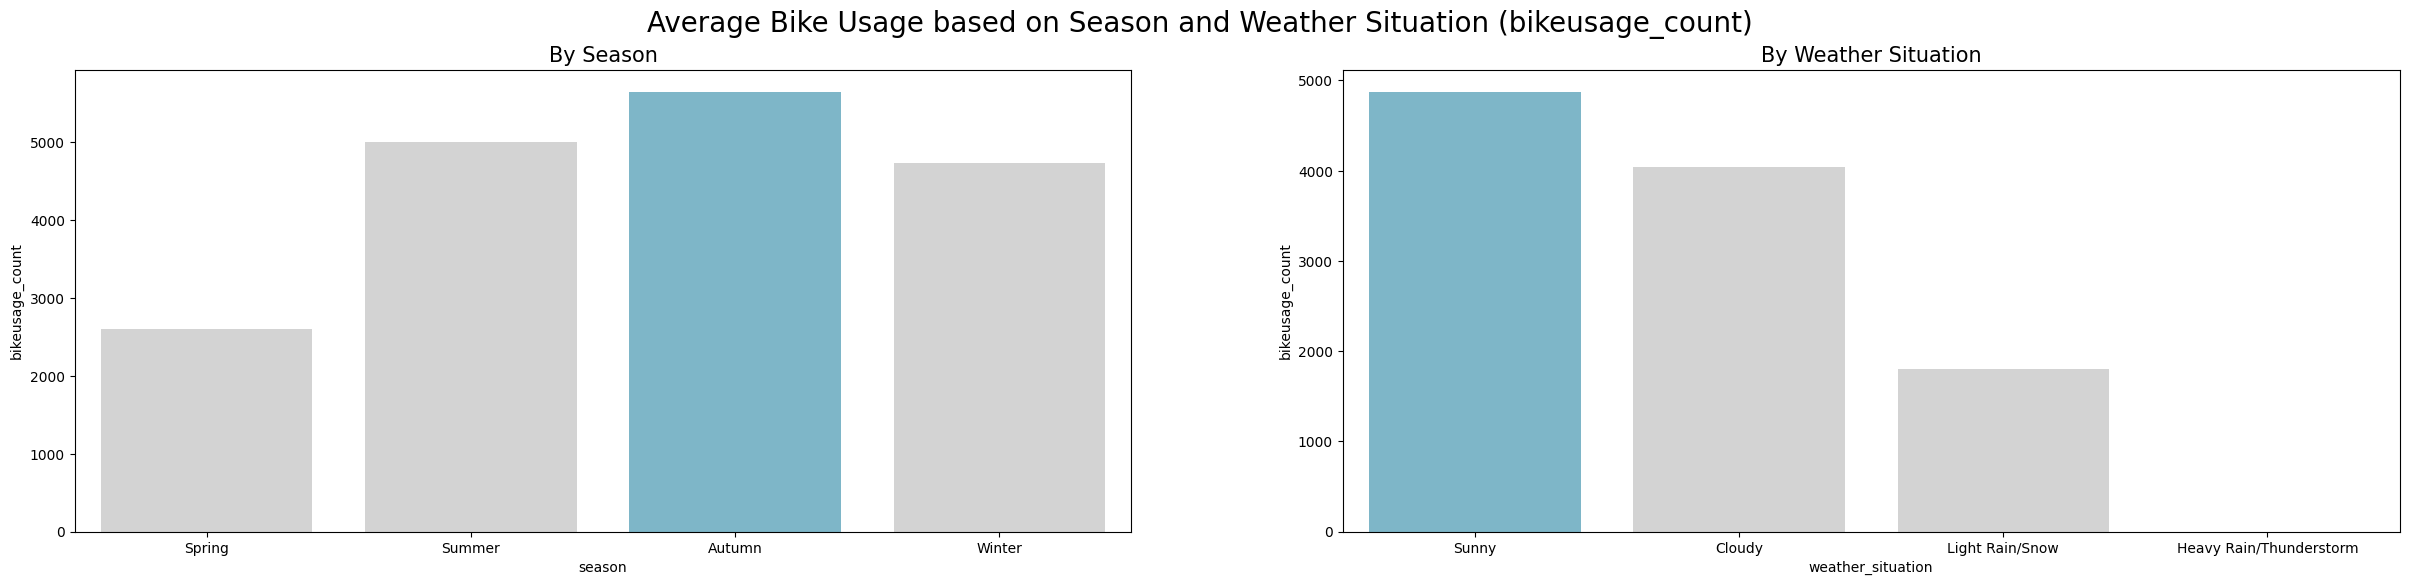

In [ ]:
# Identified Bike Usage by Season and Weather Situation
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

days_df.rename(columns={
    "count": "bikeusage_count"
},inplace=True)

colors=  ["#D3D3D3",  "#D3D3D3","#72BCD4", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="bikeusage_count",
    x="season",
    data=days_df,
    estimator="mean",
    palette=colors,
    errorbar=None,
    ax=ax[0]
)
ax[0].set_title("By Season", loc="center", fontsize=15)

colors=  ["#72BCD4","#D3D3D3",  "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="bikeusage_count",
    x="weather_situation",
    data=days_df,
    estimator="mean",
    palette=colors,
    errorbar=None,
    ax=ax[1]
)
ax[1].set_title("By Weather Situation", loc="center", fontsize=15)

plt.suptitle("Average Bike Usage based on Season and Weather Situation (bikeusage_count)", fontsize=20)
plt.show()


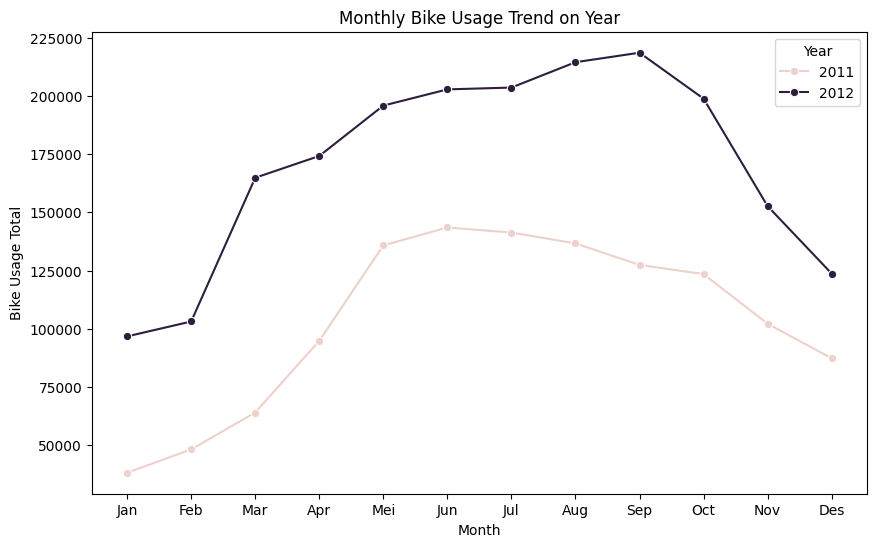

In [119]:
# Trend Monthly Bike Usage on 2011 and 2012
monthly_trend = days_df.groupby(['year_trend', "month"])["bikeusage_count"].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='bikeusage_count', hue='year_trend', data=monthly_trend, marker='o')
plt.title('Monthly Bike Usage Trend on Year')
plt.xlabel('Month')
plt.ylabel('Bike Usage Total')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Des'])
plt.legend(title='Year')
plt.show()




C:\Users\HP\AppData\Local\Temp\ipykernel_14728\4269414040.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikeusage_weekday_by_casual = days_df.groupby("weekday")["casual"].sum().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_14728\4269414040.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikeusage_weekday_by_registered = days_df.groupby("weekday")["registered"].sum().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_14728\4269414040.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

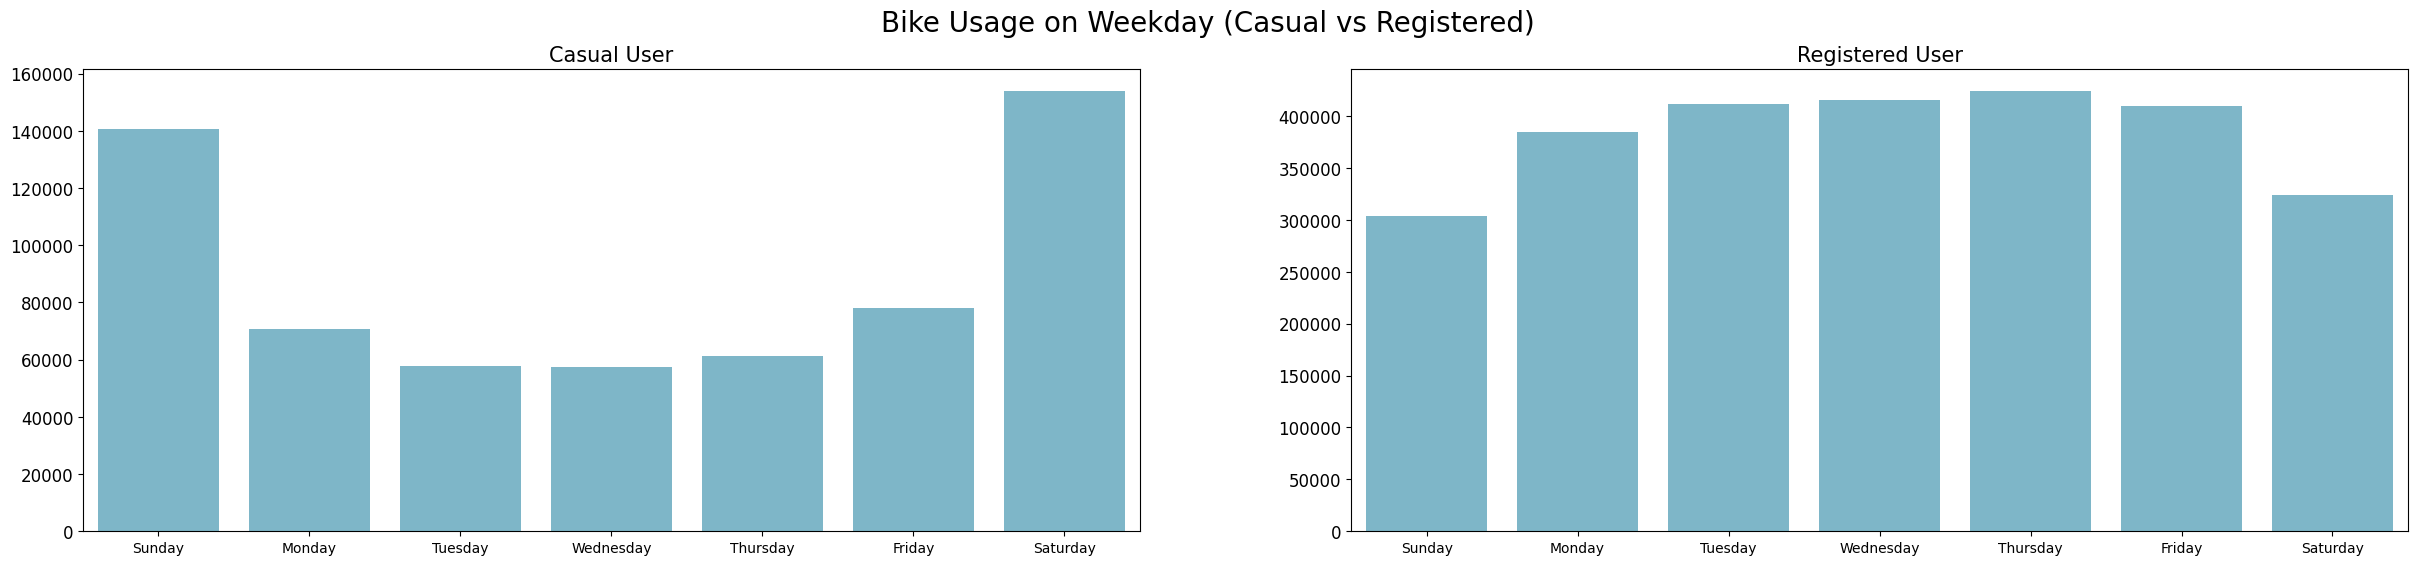

In [120]:
# Comparing Bike Usage (Casual and Registered) Weekday
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

colors= ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]


bikeusage_weekday_by_casual = days_df.groupby("weekday")["casual"].sum().reset_index() 
bikeusage_weekday_by_registered = days_df.groupby("weekday")["registered"].sum().reset_index() 

sns.barplot(x="weekday", y="casual", data=bikeusage_weekday_by_casual, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="weekday", y="registered", data=bikeusage_weekday_by_registered, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Registered User", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Bike Usage on Weekday (Casual vs Registered)", fontsize=20)
plt.show()

In [126]:
## Hour Bike Usage / Day
hours_df.rename(columns={
    "count": "bikeusage_count"
},inplace=True)

hourly_bikeusage = hours_df.groupby(['hour', "weekday"])



plt.figure(figsize=(10,6))
sns.lineplot(x='hour', y='weekday', hue='bikeusage_count', data=hourly_bikeusage, marker='o')
plt.title("Bike Usage/Hour in Day")
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.legend(title='weekday')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_14728\276063916.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_bikeusage = hours_df.groupby(['hour', "weekday"])


TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.groupby.generic.DataFrameGroupBy'>.

<Figure size 1000x600 with 0 Axes>